In [37]:
%load_ext autoreload
%autoreload 2

import h5py
import os
import numpy as np
from matplotlib import pyplot as plt

from misc.utils import load_obj, save_obj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
data_dir_lpsda = '../ext_repos/LPSDA/data/'
os.listdir(data_dir_lpsda)

['KdV_valid_medium.h5',
 'KdV_test_medium.h5',
 'KdV_train_10_easy.h5',
 'log',
 'KdV_train_500_medium.h5',
 'KdV_valid_easy.h5',
 'KdV_test_easy.h5']

In [41]:
splits = ['train', 'val', 'test']
data_dir = '../data'
data_version = 'lpsda_medium'
version_dir = os.path.join(data_dir, data_version)

for split in splits:
    if split == 'val':
        split_str = 'valid'
    elif split == 'train':
        split_str = 'train_500'
    elif split == 'test':
        split_str = 'test'
    else:
        raise ValueError('Invalid split')
    split_dir = f'KdV_{split_str}_medium.h5'

    f = h5py.File(os.path.join(data_dir_lpsda, split_dir), 'r')
    data = f[split_str] if split != 'train' else f['train']

    us, dxs, dts = [], [], []

    for idx in range(len(data['pde_140-256'])):
        u = data['pde_140-256'][idx]
        x = data['x'][idx]
        t = data['t'][idx]

        dx = x[1] - x[0]
        dt = t[1] - t[0]

        us.append(u)
        dxs.append(dx)
        dts.append(dt)

    us = np.array(us)
    dxs = np.array(dxs)
    dts = np.array(dts)

    os.makedirs(os.path.join(version_dir, split), exist_ok=True)

    save_obj((us, dxs, dts), os.path.join(version_dir, split, 'KdV'))

In [60]:
data_version = 'lpsda_medium'

for split in splits:
    us, dxs, dts = load_obj(os.path.join(data_dir, data_version, split, 'KdV'))
    print(len(us))

500
100
100


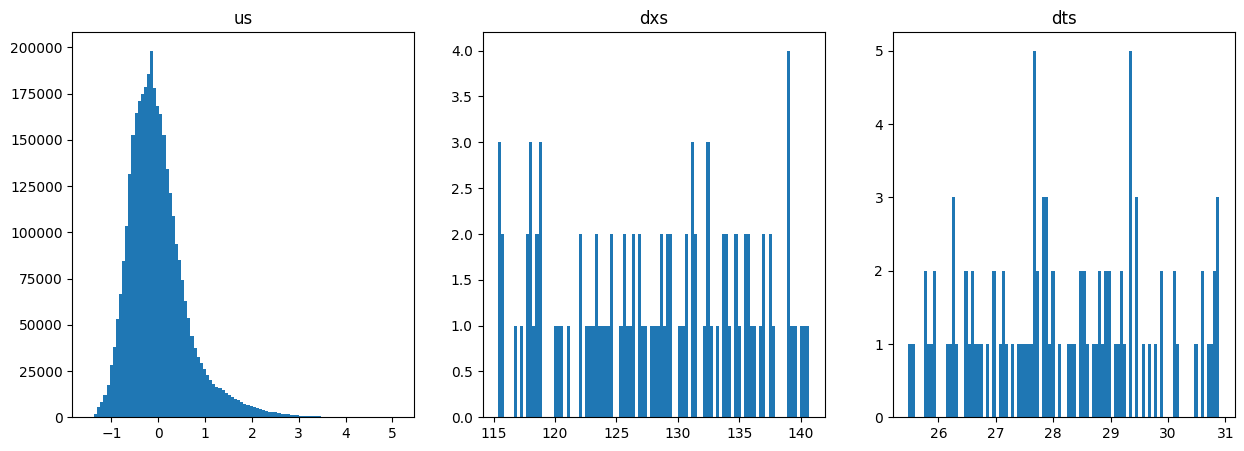

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

n_batch, n_t, n_x = us.shape
d = [us.flatten(), dxs.flatten()*n_x, dts.flatten()*n_t]
titles = ['us', 'dxs', 'dts']

for i, ax in enumerate(axs):
    ax.hist(d[i], bins=100)
    ax.set_title(titles[i])

plt.show()

In [64]:
data_version = 'lpsda_mimic_small'

for split in splits:
    us, dxs, dts = load_obj(os.path.join(data_dir, data_version, split, 'KdV'))
    print(len(us))

100
20
20


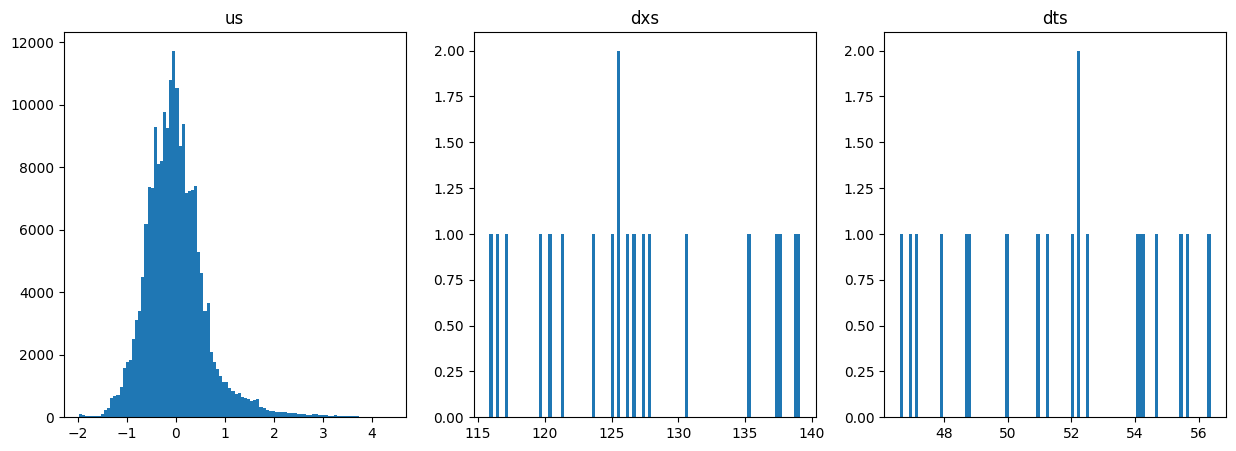

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

n_batch, n_t, n_x = us.shape
d = [us.flatten(), dxs.flatten()*n_x, dts.flatten()*n_t]
titles = ['us', 'dxs', 'dts']

for i, ax in enumerate(axs):
    ax.hist(d[i], bins=100)
    ax.set_title(titles[i])

plt.show()